In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# The current version of seaborn generates a bunch of warnings that we'll ignore
import warnings 
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

df1 = pd.read_excel('dataset.xlsx', sheetname='Driver Id')
df2 = pd.read_excel('dataset.xlsx', sheetname='rider Id')
df3 = pd.read_excel('dataset.xlsx', sheetname='ride timestamp')

In [2]:
print(df1.shape)
df1.head(2)

(937, 2)


,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29


In [3]:
print(df2.shape)
df2.head(2)

(71968, 5)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0


In [4]:
print(df3.shape)
df3.head(2)

(970405, 3)


,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51


In [5]:
df_ = pd.merge(df2, df1, on ='driver_id', how = 'inner')
df = pd.merge(df_, df3, on ='ride_id', how = 'inner')
print(df.isnull().sum()) ## NOTE: there are some ride_id in df2, which are not in df3, hence there are some NA in event & timestamp, when joined
print('size of df = ', df.shape, '\n', 'size of df_ = ', df_.shape)
df.head(20)

driver_id              0
ride_id                0
ride_distance          0
ride_duration          0
ride_prime_time        0
driver_onboard_date    0
event                  0
timestamp              0
dtype: int64
size of df =  (339000, 8) 
 size of df_ =  (68571, 6)


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,driver_onboard_date,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,dropped_off_at,2016-03-29 19:17:30


In [6]:
rqt = df3[df3.event == 'requested_at'].drop(columns = 'event')
act = df3[df3.event == 'accepted_at'].drop(columns = 'event')
art = df3[df3.event == 'arrived_at'].drop(columns = 'event')
pt = df3[df3.event == 'picked_up_at'].drop(columns = 'event')
dt = df3[df3.event == 'dropped_off_at'].drop(columns = 'event')

df_4 = pd.merge(rqt, act, on = 'ride_id', how = 'inner')
df_5 = pd.merge(df_4, art, on = 'ride_id', how = 'inner')
df_6 = pd.merge(df_5, pt, on = 'ride_id', how = 'inner')
df_7 = pd.merge(df_6, dt, on = 'ride_id', how = 'inner')

df_7.columns = ['ride_id', 'request_time', 'accept_time', 'arrive_time', 'pickup_time', 'dropoff_time']
df_7.head()  

,ride_id,request_time,accept_time,arrive_time,pickup_time,dropoff_time
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:19,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 09:44:33,2016-06-13 10:03:05
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:21,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:26:18,2016-05-14 05:34:17
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:09,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:47:32,2016-05-16 15:54:18
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:36,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:35:15,2016-05-11 19:40:47
4,0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:11:38,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:16:55,2016-04-26 18:24:14


In [7]:
df = pd.merge(df_, df_7, on = 'ride_id', how = 'inner')
df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,driver_onboard_date,request_time,accept_time,arrive_time,pickup_time,dropoff_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-03-29,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-03-29,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-03-29,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:07:02,2016-04-20 22:20:45


In [8]:
print('*'*10, 'getting the basic summaries!', '*'*10)
print('size of data = ', df.shape)
print('Total drivers = ', df.driver_id.nunique())
print('Total rides = ', df.ride_id.nunique())
print('Avg time spent on each ride = ', df.ride_duration.mean()/60, 'min')
print('Avg distance travelled on each ride = ', df.ride_distance.mean()/1000, 'km')

'''
Base Fare                               $2.00
Cost per Mile                           $1.15
Cost per Minute                         $0.22
Service Fee                             $1.75
Minimum Fare                            $5.00
Maximum Fare                            $400.00

'''
avg_dist = df.ride_distance.mean()*0.6213/1000  # 1 km = 0.6213 miles
print('Avg revenue per trip = $ ', 2.00+(1.15*avg_dist)+(0.22*df.ride_duration.mean()/60)+1.75)

********** getting the basic summaries! **********
size of data =  (67800, 11)
Total drivers =  307
Total rides =  67800
Avg time spent on each ride =  14.444112340216323 min
Avg distance travelled on each ride =  7.040376415929203 km
Avg revenue per trip = $  11.958018462146928


In [9]:
new_df = df.copy()
new_df['request_date'] = new_df.request_time.apply(lambda timestamp: timestamp.date())
new_df['rqst_to_accpt_time'] = new_df.accept_time - new_df.request_time
new_df['accpt_to_arrive_time'] = new_df.arrive_time - new_df.accept_time
new_df['arrive_to_pkup_time'] = new_df.pickup_time - new_df.arrive_time
# dropoff - pickup = ride_duration

#Note: NOT considering prime time data for exploratory analysis of data.
revnue = 2.00+1.15*new_df.ride_distance*0.6213/1000+0.22*df.ride_duration/60+1.75
new_df['revenue'] = np.where(revnue < 5, 5, revnue) #new_df['revenue'] = np.where(revnue > 400, 400, )
print('No. of greater than 400 revenue trips  = ', np.sum(new_df.revenue > 400))
new_df.loc[new_df.revenue > 400,'revenue'] = 400
print('after correction, > 400$ = ', np.sum(new_df.revenue > 400))

new_df.head()

No. of greater than 400 revenue trips  =  1
after correction, > 400$ =  0


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,driver_onboard_date,request_time,accept_time,arrive_time,pickup_time,dropoff_time,request_date,rqst_to_accpt_time,accpt_to_arrive_time,arrive_to_pkup_time,revenue
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,2016-03-29,2016-04-23 02:13:50,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:16:40,2016-04-23 02:22:07,2016-04-23,00:00:25,00:02:21,00:00:04,6.242950
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,2016-03-29,2016-03-29 19:00:49,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:04:01,2016-03-29 19:17:30,2016-03-29,00:00:03,00:03:05,00:00:04,9.118466
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,2016-03-29,2016-06-21 11:56:31,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:01:35,2016-06-21 12:11:07,2016-06-21,00:00:08,00:04:53,00:00:03,8.192306
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,2016-03-29,2016-05-19 09:15:29,2016-05-19 09:15:33,2016-05-19 09:18:20,2016-05-19 09:18:20,2016-05-19 10:13:58,2016-05-19,00:00:04,00:02:47,00:00:00,62.633710
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,2016-03-29,2016-04-20 22:05:30,2016-04-20 22:05:32,2016-04-20 22:07:03,2016-04-20 22:07:02,2016-04-20 22:20:45,2016-04-20,00:00:02,00:01:31,-1 days +23:59:59,9.707814


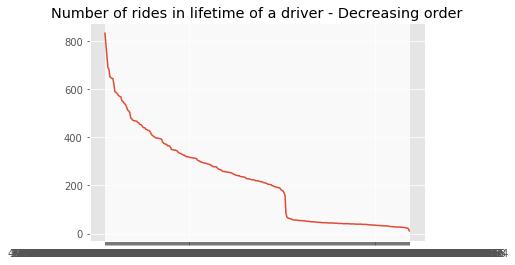

In [10]:
plt.plot(new_df.driver_id.value_counts());
plt.title('Number of rides in lifetime of a driver - Decreasing order'); plt.show()

Text(0.5, 1.0, 'Distribution of lifetime revenues')

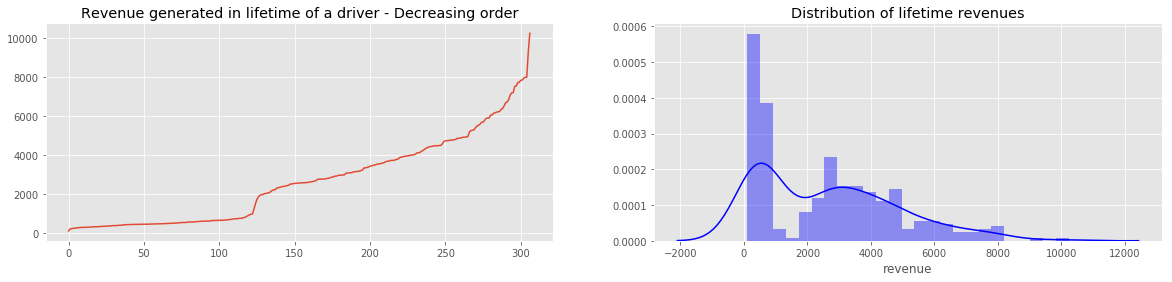

In [11]:
life_revenue = new_df.groupby('driver_id').sum()['revenue']
f, (a,b) = plt.subplots(1,2, figsize = (20,4))
a.plot(np.sort(life_revenue)); a.set_title('Revenue generated in lifetime of a driver - Decreasing order');
sb.distplot(life_revenue, bins = 25, color="b", ax=b); b.set_title('Distribution of lifetime revenues')

Text(0.5, 1.0, 'Daily Revenue')

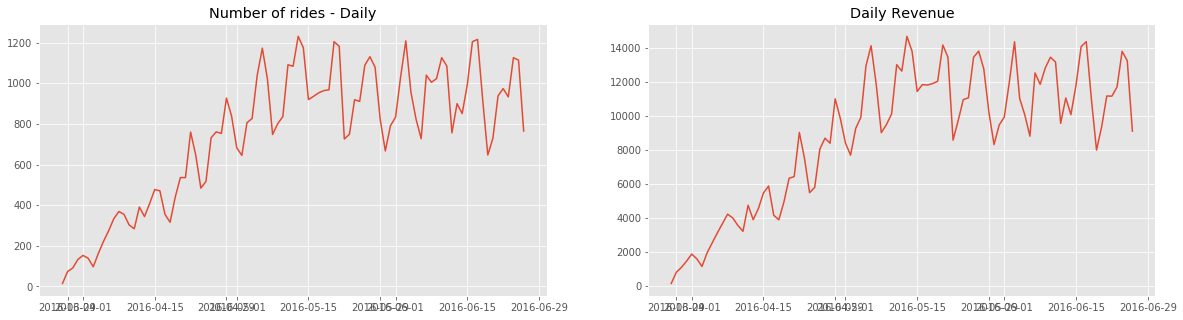

In [12]:
demand_over_time = new_df[['ride_id','request_date']].groupby('request_date').count()
daily_revenue_all = new_df.groupby('request_date').sum()['revenue']

f, (a,b) = plt.subplots(1,2,figsize = (20,5))
a.plot(demand_over_time); a.set_title('Number of rides - Daily')
b.plot(daily_revenue_all); b.set_title('Daily Revenue')

Text(0.5, 1.0, 'Distribution of LOG(Revenue)')

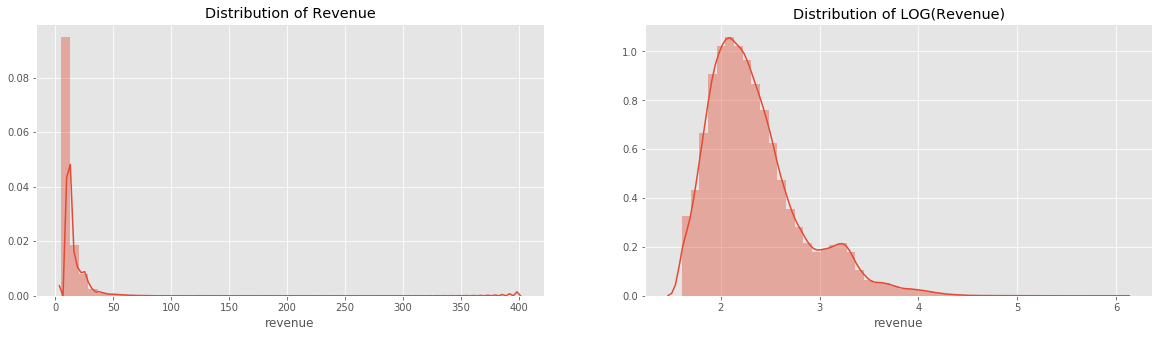

In [13]:
f, (a,b) = plt.subplots(1,2,figsize = (20,5))
sb.distplot(new_df.revenue, ax = a); a.set_title('Distribution of Revenue')
sb.distplot(np.log(new_df.revenue), ax = b); b.set_title('Distribution of LOG(Revenue)')

Text(0.5, 1.0, 'Distribution of LOG(ride_duration)')

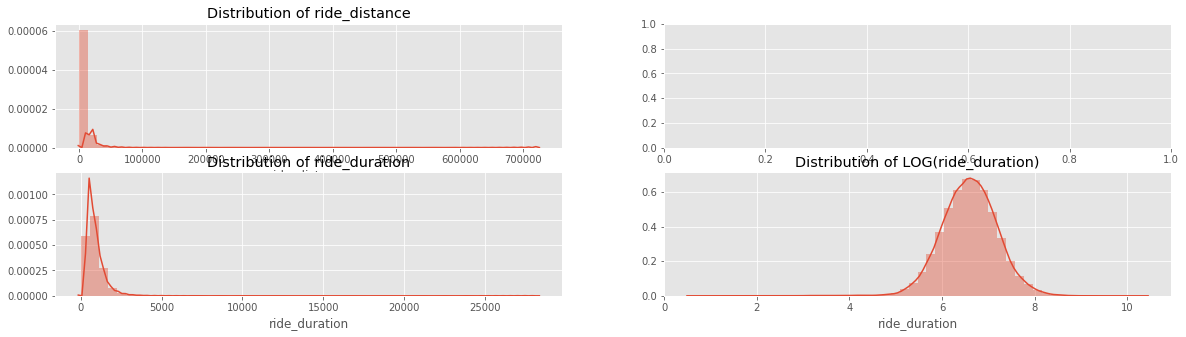

In [14]:
f, ((a,b),(c,d)) = plt.subplots(2,2,figsize = (20,5))

sb.distplot(new_df.ride_distance, ax = a); a.set_title('Distribution of ride_distance')
# sb.distplot(np.log(new_df.ride_distance.dropna()), ax = b); b.set_title('Distribution of LOG(ride_distance)')

sb.distplot(new_df.ride_duration, ax = c); c.set_title('Distribution of ride_duration')
sb.distplot(np.log(new_df.ride_duration), ax = d); d.set_title('Distribution of LOG(ride_duration)')

Text(0.5, 1.0, 'day of week of Request')

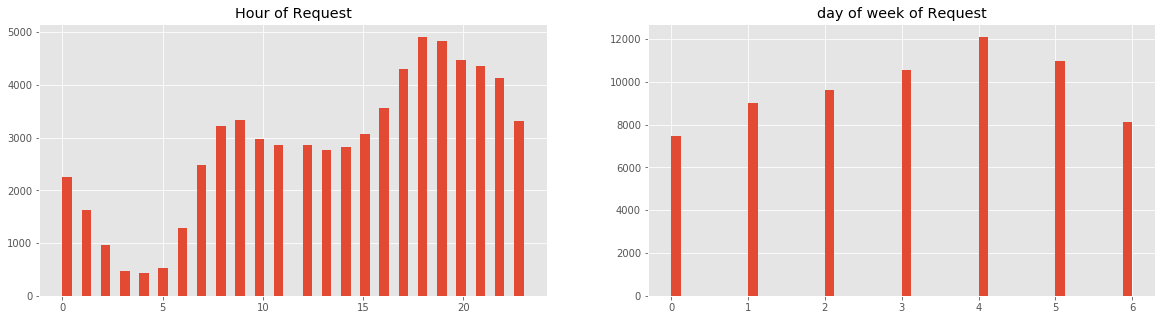

In [15]:
f, (a,b) = plt.subplots(1,2,figsize = (20,5))
a.hist(new_df.request_time.apply(lambda timestamp: timestamp.hour), bins = 48); a.set_title('Hour of Request')
b.hist(new_df.request_time.apply(lambda timestamp: timestamp.dayofweek), bins = 48); b.set_title('day of week of Request')